# Spotify Music Taste Analysis Project 

In [1]:
%run config.ipynb

import json
import import_ipynb
import config 

import pprint as pp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

importing Jupyter notebook from config.ipynb


## Accessing Spotify Data & Creating the Dataset 


I used the Spotipy library to access the spotify data and created a script to gather a playlist from my friend's account.  
I then created a dataframe with all the necessary information I needed from each song in the playlist. 

In [292]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
    return playlist_songs


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artist'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    playlist_df['track_name'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['username'] = np.array([song['added_by']['id'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['duration'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])

    return playlist_df

In [331]:
maya = '1158424416'  

m_playlist = get_user_playlist(maya, 'spotify:playlist:1jEd91bSorc9g4ZdCa6tMG',sp) 
m_df = create_dataframe(m_playlist)

m_playlist2 = get_user_playlist(maya, 'spotify:playlist:3NHcPHaQXFJsqAxEySZz1t',sp) 
m_df2 = create_dataframe(m_playlist2)

m_playlist3 = get_user_playlist(maya, 'spotify:playlist:3NXxpmpT7wqRCqCDMpMe8X',sp) 
m_df3 = create_dataframe(m_playlist3)

e_playlist = get_user_playlist('lizzy_real','spotify:playlist:5f6r5dtGWyCqVnwugk83zA', sp)
e_df = create_dataframe(e_playlist)

e_playlist2 = get_user_playlist('lizzy_real','spotify:playlist:17GkBAfkdTCWA4bWbLSdh7', sp)
e_df2 = create_dataframe(e_playlist2)

e_playlist3 = get_user_playlist('lizzy_real','spotify:playlist:2ovGMJNOzr4B1kbhZm4Uou', sp)
e_df3 = create_dataframe(e_playlist3)

#display(e_df)


df_songs = e_df.append([m_df,m_df2,m_df3,e_df2,e_df3])
df_songs['username'].value_counts()

1158424416    300
lizzy_real    295
Name: username, dtype: int64

In [294]:
display(df_songs)

,artist,track_name,id,username,explicit,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,Lil Baby,Trap Star,3iWt7if5iOXxBVsZdYZcGT,lizzy_real,True,203480,0.638,-9.613,146.038,0.0644,0.426,0.0797,0.1580,0.1100
1,Gunna,Mind On A Milli (feat. Hoodrich Pablo Juan),5Z8RmbBjnmaF0iKWgyp27N,lizzy_real,True,183650,0.875,-8.182,115.000,0.4780,0.540,0.2470,0.1190,0.0881
2,Chief Keef,Faneto,6l4qV9VNeCOesvcLPJMO9y,lizzy_real,True,206654,0.849,-7.399,144.186,0.3460,0.755,0.3930,0.0564,0.3630
3,YNW Melly,Florida Water (Feat. J Green),6RmnCtZRg5fLOTWhUk8aIp,lizzy_real,True,214179,0.763,-7.934,134.943,0.5030,0.461,0.5870,0.1680,0.1160
4,Gunna,Sold Out Dates (feat. Lil Baby),72LlwJM24dWKpFLVB3PWWQ,lizzy_real,True,166297,0.824,-7.118,127.003,0.4330,0.554,0.3160,0.1240,0.1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lil Durk,Breather,6wlK5pPaeWWAS4Fzff3hcK,lizzy_real,True,276295,0.809,-6.594,132.010,0.0814,0.506,0.6110,0.1060,0.1280
96,Jaheim,Fabulous,3MyyXUEVG6eHgg0EznPLCY,lizzy_real,False,227066,0.657,-7.573,75.982,0.5480,0.464,0.5980,0.1610,0.0614
97,Beres Hammond,I Feel Good,2OwvleQsnjgOYbH3RRfwQr,lizzy_real,False,222960,0.632,-5.463,168.195,0.0409,0.606,0.6200,0.0534,0.2890
98,YoungBoy Never Broke Again,Show Me Your Love,6AAShoDuz7fpM912cmuY4r,lizzy_real,True,267937,0.858,-8.717,129.939,0.3980,0.504,0.2740,0.1070,0.1470


## VISUALISING THE DATA

I used a seaborn pairplot to compare the data from each playlist.  
My aim was to judge if there was a significant difference in the data of each playlist. I used the distrubution curves on the diagonal to determine this.

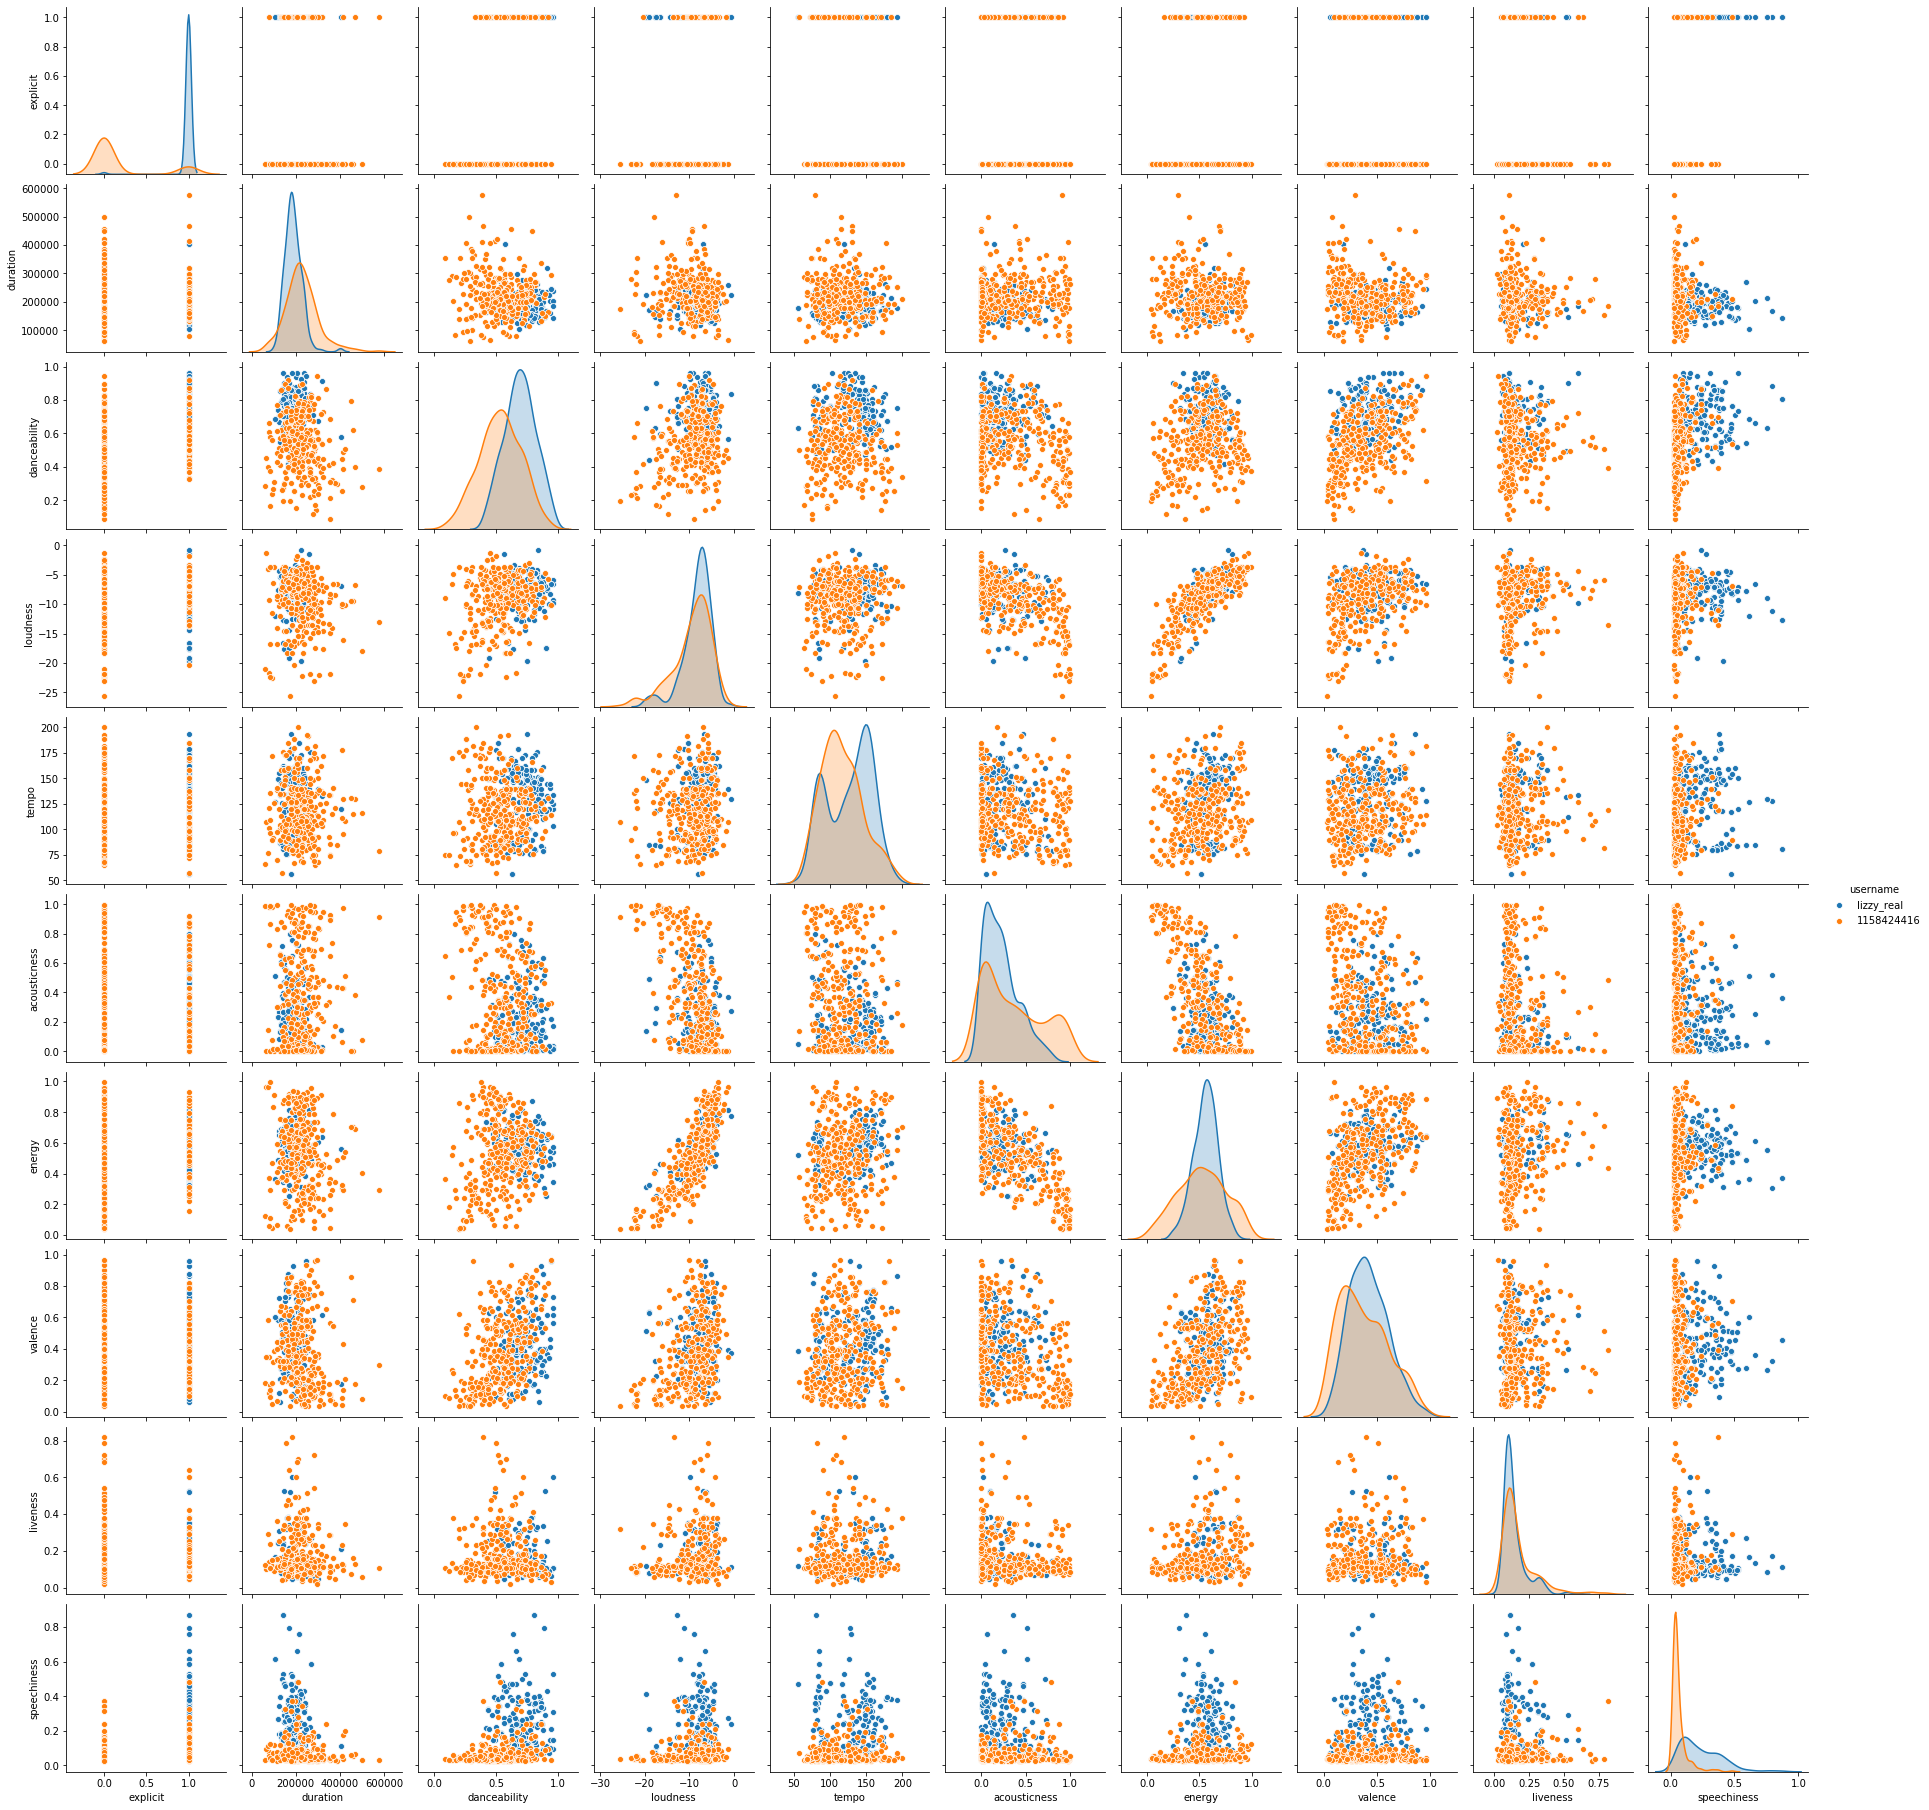

In [28]:
## doing a pairplot to see if there's a noticiable difference in their music
music_pairplot = sns.pairplot(df_songs, hue='username')
music_pairplot

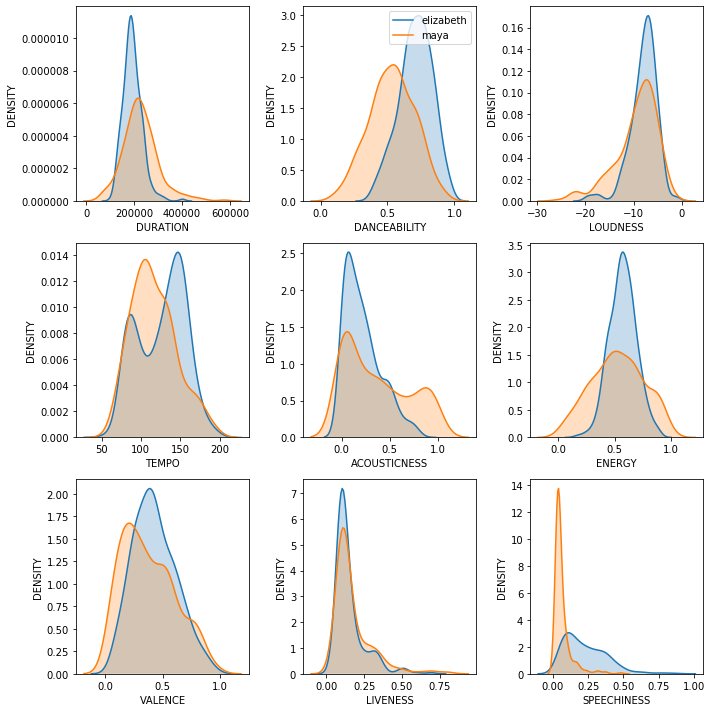

In [306]:
plt.subplots(3, 3, figsize=(10,10))
for i, col in enumerate(df_songs.columns[5:]): #change this first
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df_songs.loc[df_songs['username'] == 'lizzy_real', col], shade=True, label='elizabeth')
    sns.kdeplot(df_songs.loc[df_songs['username'] == '1158424416', col], shade=True, label='maya')

    plt.ylabel('DENSITY')

    plt.xlabel(col.upper())

    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

plt.tight_layout()

# the x-axis in kde is range of values in dataset
# the y-axis is the kernel density estimate.

# STANDARDISING DATA

Standardisation is essentially making variables follow the same scale. This is very important and I will explain why. <br>  Here is my data BEFORE standardsing:

In [233]:
df_non_standardised = df_songs.drop(['username','artist','artist_id','explicit','track_name','id'], axis=1)
display(df_non_standardised.head())

,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,203480,0.638,-9.613,146.038,0.0644,0.426,0.0797,0.1580,0.1100
1,183650,0.875,-8.182,115.000,0.4780,0.540,0.2470,0.1190,0.0881
2,206654,0.849,-7.399,144.186,0.3460,0.755,0.3930,0.0564,0.3630
3,214179,0.763,-7.934,134.943,0.5030,0.461,0.5870,0.1680,0.1160
4,166297,0.824,-7.118,127.003,0.4330,0.554,0.3160,0.1240,0.1150


### Why do we standardise?

Before standardising my data, the 'Duration' column has data with a mean of 218957, which represents the length of the song in miliseconds. Now compare that to valence and energy who have mean values of 0.578350 and 0.441434 respectively. 
There's obviously a massive difference in the size of these variables! This means that the 'Duration' column has a much larger weight than other values. The algorithm will be biased towards classifying music based on the duration of a song rather than (roughly) equally between all the variables - the distance between each song in the space will mostly be determined by its duration.

This is wehre standardsing comes in. By standardising, we make all the variables have the same scale which reduces the issue of certain variables having a much larger weight. This is calculated by finding the mean and standrd deviation of each variable and then for each object subtracting the mean and dividing by the standard deviation of a variable.

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [243]:
# fit the dataset but remove non-numerical values and the target classes.
scaler.fit(df_songs.drop(['username','artist','artist_id','explicit','track_name','id'], axis=1))

StandardScaler()

In [244]:
scaled_features = scaler.transform(df_songs.drop(['username','artist','artist_id','explicit','track_name','id'], axis=1))

In [245]:
# creating a dataframe of scaled values
df_standardised = pd.DataFrame(scaled_features, columns=df_songs.columns[6:])

Here is my data AFTER standardising. Notice how every variable follows the same scale. No variable has a much larger weight. 

In [246]:
df_standardised.head()

,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,-0.119452,0.094659,-0.255485,0.819664,-0.818014,-0.669815,-1.544937,-0.047264,-0.260301
1,-0.442061,1.474090,0.129112,-0.223854,0.648211,-0.050190,-0.751269,-0.386531,-0.417740
2,-0.067816,1.322760,0.339552,0.757399,0.180267,1.118400,-0.058647,-0.931100,1.558515
3,0.054606,0.822207,0.195765,0.446643,0.736837,-0.479579,0.861686,0.039728,-0.217167
4,-0.724372,1.177251,0.415074,0.179695,0.488685,0.025904,-0.423934,-0.343035,-0.224356


# Implementing Algorithms

## 1. KNN (K Nearest Neighbours)

Knn is a classification algorithm that predicts the class (where class is the owner of the song) of an object (an indiviual song) by the most common class of K (which represents a number) of already classified objects (songs) that are nearest to it in a space.  

In [287]:
from sklearn.model_selection import train_test_split

X = df_standardised
y = df_songs['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [288]:
from sklearn.neighbors import KNeighborsClassifier

In [334]:
knn = KNeighborsClassifier(n_neighbors=1)
## fit the model with the training data
knn.fit(X_train, y_train)

## predict results with the test data, see if it's accurate using confusion matrix and classifcation reports!
pred_knn = knn.predict(X_test)

In [335]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

### Evaluating Performance

I used 2 methods for evaluating the performance of each algorithm:

- [Confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) <br>
- [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [353]:
knn_accuracy_score = accuracy_score(y_test, pred_knn)*100
knn_recall_score = recall_score(y_test, pred_knn, average='macro')*100
knn_precision_score = precision_score(y_test, pred_knn, average='macro')*100

f"Accuracy : {knn_accuracy_score:.2f}, Recall: {knn_recall_score:.2f},Precision: {knn_precision_score:.2f}"

'Accuracy : 85.47, Recall: 85.28,Precision: 85.43'

In [255]:
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=1


[[74 23]
 [ 9 73]]


              precision    recall  f1-score   support

  1158424416       0.89      0.76      0.82        97
  lizzy_real       0.76      0.89      0.82        82

    accuracy                           0.82       179
   macro avg       0.83      0.83      0.82       179
weighted avg       0.83      0.82      0.82       179



#### Model Optimisation - "The Elbow Method"

When K=1,  precision, recall and accuracy metrics are peforming at 83%,83% and 82% respectively. <br> I can improve this by implemnting the Elbow Method, which is a way of finding the optimal K-Value.

In [256]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

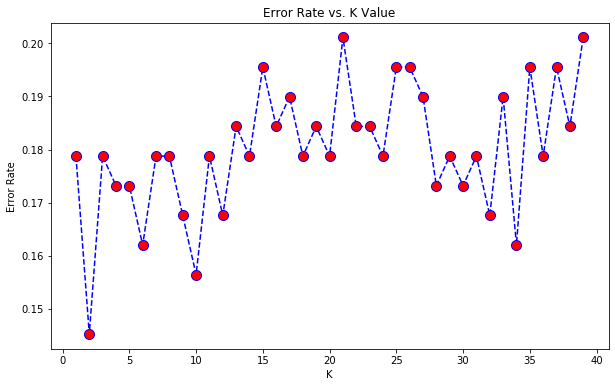

In [257]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

optimal K value = 2

In [354]:
# same implementation but using optimal K-value of 2.

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred_knn_2 = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=2


[[85 12]
 [14 68]]


              precision    recall  f1-score   support

  1158424416       0.86      0.88      0.87        97
  lizzy_real       0.85      0.83      0.84        82

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



#### Evaluation of Optimised KNN Model 

After implemenmting the elbow method, I discovered the optimal value for K (which represents the number of nearest neighour labels used to assign a new label) was 2. After implemnting K=2, precision, recall and accuracy all performed at 85%.


In [356]:
knn_accuracy_score_2 = accuracy_score(y_test, pred_knn_2)*100
knn_recall_score_2 = recall_score(y_test, pred_knn_2, average='macro')*100
knn_precision_score_2 = precision_score(y_test, pred_knn_2, average='macro')*100

f"Accuracy : {knn_accuracy_score_2:.2f}, Recall: {knn_recall_score_2:.2f},Precision: {knn_precision_score_2:.2f}"

'Accuracy : 85.47, Recall: 85.28,Precision: 85.43'

## 2. Logistic Regression

Logistic regression relies on the Sigmoid function. The [logistic function](https://en.wikipedia.org/wiki/Logistic_function) is a sigmoid funciton. When plotted, it looks like an S-shaped curve. [This article nicely explains it.](https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102)

In [262]:
X = df_standardised
y = df_songs['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [263]:
from sklearn.linear_model import LogisticRegression
# 1. isntantiate logistic regression object
logr = LogisticRegression()

# 2. fit training data
logr.fit(X_train, y_train)

# 3. predict using the test data
pred_lr = logr.predict(X_test)

In [350]:
## evaluate the model
print(confusion_matrix(y_test, pred_lr))
logr_accuracy_score = accuracy_score(y_test, pred_lr)*100
logr_recall_score = recall_score(y_test, pred_lr,  average='macro')*100
logr_precision_score = precision_score(y_test, pred_lr,  average='macro')*100

print(classification_report(y_test, pred_lr))

[[84 13]
 [ 9 73]]
              precision    recall  f1-score   support

  1158424416       0.90      0.87      0.88        97
  lizzy_real       0.85      0.89      0.87        82

    accuracy                           0.88       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179



In [351]:
f"Accuracy : {logr_accuracy_score:.2f}, Recall: {logr_recall_score:.2f},Precision: {logr_precision_score:.2f}"

'Accuracy : 87.71, Recall: 87.81,Precision: 87.60'

### Evaluation of Logistic Regression

Precision, recall and accuracy metrics are all performing at 88%. I can improve this by using a Random Search, a hyperparamter optimisation method.

#### Model Optimisation - Random Search
Random Search relies on [hyperparamter tuning](https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35). Hyperparameters are set BEFORE training a model, whereas parameters are found BY training the model.

Random Search generates RANDOM values for each hyperparameter being tested, and then uses cross validation to test the accuracy of each combination.


In [265]:
from sklearn.model_selection import RandomizedSearchCV

In [285]:
# 1. generate the hyperparamter values for logistic regression
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

# 2. put the hyperparamters in a param_grid (a dictionary for the values)
param_grid_logr = dict(C=C, penalty=penalty, solver=solver)

# 3. create GridSearch object
grid_search_logr = RandomizedSearchCV(LogisticRegression(),param_grid_logr)

# 4. fit data using grid search
grid_search_logr.fit(X_train,y_train)

# 5. diplay the best paramters and estimators
print("These are the best parameters: ", grid_search_logr.best_params_)
print("This is the best estimator:", grid_search_logr.best_estimator_)

These are the best parameters:  {'solver': 'saga', 'penalty': 'l2', 'C': 2.7825594022071245}
This is the best estimator: LogisticRegression(C=2.7825594022071245, solver='saga')


In [286]:
# 6. test model using new hyperparameters
new_logr_model = grid_search_logr.predict(X_test)

# 7. evaluate performance of new model
print(confusion_matrix(y_test,new_logr_model))
print(classification_report(y_test,new_logr_model))

[[84 13]
 [ 9 73]]
              precision    recall  f1-score   support

  1158424416       0.90      0.87      0.88        97
  lizzy_real       0.85      0.89      0.87        82

    accuracy                           0.88       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179



In [349]:
print(confusion_matrix(y_test, pred_lr))
logr_accuracy_score = accuracy_score(y_test, new_logr_model)*100
logr_recall_score = recall_score(y_test, new_logr_model,  average='macro')*100
logr_precision_score = precision_score(y_test, new_logr_model,  average='macro')*100

f"Accuracy : {logr_accuracy_score:.2f}, Recall: {logr_recall_score:.2f},Precision: {logr_precision_score:.2f}"

[[84 13]
 [ 9 73]]


'Accuracy : 87.71, Recall: 87.81,Precision: 87.60'

#### Evaluation of Optimised Logistic Regression Model

Even after optimising using RandomSearch, the accuracy, precision and recall vlaues didn't change. <br> This possibly suggets that the peak performance for using Logistic Regression on my data set is 88%.

## 3. Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. [this article explains svm](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) 

In [274]:
X = df_features
y = df_songs['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [275]:
from sklearn.svm import SVC

In [276]:
sup_v = SVC()

sup_v.fit(X_train, y_train)

pred_svm = sup_v.predict(X_test)

print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

[[83 14]
 [ 6 76]]
              precision    recall  f1-score   support

  1158424416       0.93      0.86      0.89        97
  lizzy_real       0.84      0.93      0.88        82

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179



In [348]:
svm_accuracy_score = accuracy_score(y_test, pred_svm)*100
svm_recall_score = recall_score(y_test, pred_svm,  average='macro')*100
svm_precision_score = precision_score(y_test, pred_svm,  average='macro')*100

f"Accuracy : {svm_accuracy_score:.2f}, Recall: {svm_recall_score:.2f},Precision: {svm_precision_score:.2f}"

'Accuracy : 88.83, Recall: 89.12,Precision: 88.85'

Precision, recall, accuracy are all performing at an average of 89%. However, this can be improved by implemeting a Grid Search!

#### Model Optimisation - "Grid Search"
Grid search also relies on Hyperparemeter tuning. <br>  It generates EVENLY SPACED values for each hyperparameter being tested, and then uses cross validation to test the accuracy of each combination.<br> [Article on hyperparameter tuning for SVM, also provides definition of C and Gamma](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167)


In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
# 1. create a dictionary of hyperparameter values 
param_grid_svm = {'C': np.logspace(0, 4, num=10), 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

# 2. create GridSearch object
random_search_svm = GridSearchCV(SVC(),param_grid_svm)

# 3. fit the data
new_svm_model = random_search_svm.fit(X_train,y_train)


In [310]:
# 4. diplay bets paramters and estimators
print(new_svm_model.best_estimator_)
print(new_svm_model.best_params_)

SVC(gamma=0.1)
{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [345]:
# 5. evaluate performance of new model
new_svm_model = random_search_svm.predict(X_test)

print(confusion_matrix(y_test,new_svm_model))
print(classification_report(y_test,new_svm_model))

[[84 13]
 [ 5 77]]
              precision    recall  f1-score   support

  1158424416       0.94      0.87      0.90        97
  lizzy_real       0.86      0.94      0.90        82

    accuracy                           0.90       179
   macro avg       0.90      0.90      0.90       179
weighted avg       0.90      0.90      0.90       179



In [347]:
svm_accuracy_score_2 = accuracy_score(y_test, new_svm_model)*100
svm_recall_score_2 = recall_score(y_test,new_svm_model, average='macro')*100
svm_precision_score_2 = precision_score(y_test, new_svm_model,  average='macro')*100

f"Accuracy : {svm_accuracy_score_2:.2f}, Recall: {svm_recall_score_2:.2f}, Precision: {svm_precision_score_2:.2f}"

'Accuracy : 89.94, Recall: 90.25,Precision: 89.97'

#### Evaluation of Optimised SVM Model

Precision, recall adn accuracy metrics are all performing at 90%! This suggests that SVM is the best model for my data, with Hyperparameters of C=1.0, gamma=0.1, kernel=rbf.

# MODEL EVALUATION BONUS : ROC AUC

I found out about ROC curves & ROC AUC (another evaluation metric) after completing this project, so I'm gonna implement it here and figure out how it works and if it's more effective than a confusion matrix and classification report.

## what are roc curves?

ROC stands for 'Reciever Operating Characteristic'. It's a graph that shows the tradeoff between the TPR (true positive rate, plotted on y-axis) and the FPR (false positive rate, plotted on x-axis). Therefore, classifiers with curves closer to the top left suggest better performance bcause the TPR is higher than the FPR. 

- #### what does the AUC part mean?
AUC stands for area under curve. <br> It's used to compare diffrent classifiers by summarising the performance of each classifier into a single measure - the actual area under the plotted curve. Classifiers with curves closer to the top left (i.e, the best classifier) usually have a larger area under their curve.




##### sidenote:
Notice that I used .predict_proba instead of .predict for each model. This is because for ROC curves, you use probabilistic classifiers rather than discrete classifiers.
 - a probabilisitc classifier gives a probability or score that reflects the degree to which an instance belongs to one class rather than another



In [126]:
# 1. import metrics
from sklearn import metrics

In [290]:
# 2.load and split the dataset (i've already imported train_test_split)
X = df_standardised
y = df_songs['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [291]:
# 3. fit models 

# KNN
knn_roc = KNeighborsClassifier(n_neighbors=1)
knn_roc.fit(X_train, y_train)
y_pred_knn = knn_roc.predict_proba(X_test)[:,1] 

# Logistic Regression
logr_roc = LogisticRegression()
logr_roc.fit(X_train, y_train)
y_pred_logr = logr_roc.predict_proba(X_test)[:,1] 

# SVM
svm_roc = SVC(probability=True)
svm_roc.fit(X_train, y_train)
y_pred_svm = svm_roc.predict_proba(X_test)[:,1] 

# [:,1] means that only the probaility of getting output as 1 will be displayed.

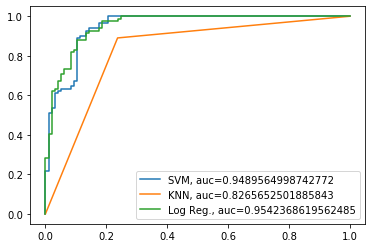

In [161]:
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm,pos_label='lizzy_real')
auc = metrics.roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr_svm,tpr_svm,label="SVM, auc="+str(auc))

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_knn,pos_label='lizzy_real')
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(auc))

fpr_logr, tpr_logr, _ = metrics.roc_curve(y_test,  y_pred_logr,pos_label='lizzy_real')
auc = metrics.roc_auc_score(y_test, y_pred_logr)
plt.plot(fpr_logr,tpr_logr,label="Log Reg., auc="+str(auc))



plt.legend(loc=4)
plt.show()

#### Evaluting ROC AUC

I find this super interesting because the graph suggets that Logistic Regression (auc=0.954) should perform better than SVM (auc=0.949), because it's auc is slighlty larger. However, my classification reports show that this isn't true. <br>

It's important to note that any [AUC above 0.8 suggests the model is a great choice](https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=AREA%20UNDER%20THE%20ROC%20CURVE,-AUC%20is%20an&text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding.), so technically all the models I used are a good fit for my data. I believe this is because of the size of my dataset - if it was larger, my evaluations maybe wouldn't have been so high. The alrger the dataset, the more insights you can extract and it's easier for anomalies to be spotted.

# THANKS FOR READING!

This project was purely to explore ML concepts that were completely new to me. Please message me if the way if I have incorrectly defined any terms or if you have suggestions for improving my project :) Thanks again for taking the time to read it!